In [52]:
# Simple EDA: Load and Inspect Files
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load ICD codes CSV
icd_df = pd.read_csv("res/codes_icd_diagnosis.csv")
print("ICD Codes - Shape (rows, columns):", icd_df.shape)
print("\nICD Codes - First 5 Rows:")
print(icd_df.head())
print("\nICD Codes - Columns:")
print(icd_df.columns.tolist())


ICD Codes - Shape (rows, columns): (112107, 3)

ICD Codes - First 5 Rows:
  icd_code  icd_version                             long_title
0     0010            9         Cholera due to vibrio cholerae
1     0011            9  Cholera due to vibrio cholerae el tor
2     0019            9                   Cholera, unspecified
3     0020            9                          Typhoid fever
4     0021            9                    Paratyphoid fever A

ICD Codes - Columns:
['icd_code', 'icd_version', 'long_title']


In [53]:
# Load JSON with example cases
with open("res/patient_data.json", "r", encoding="utf-8") as f:
    cases = json.load(f)

print("\nNumber of patients in JSON:", len(cases))
print("\nExample of One Patient Record:")
print(json.dumps(cases[0], indent=2, ensure_ascii=False))



Number of patients in JSON: 10

Example of One Patient Record:
{
  "text": " \nName:  ___                 Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   M\n \nService: ORTHOPAEDICS\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___.\n \nChief Complaint:\nRight knee pain\n \nMajor Surgical or Invasive Procedure:\nRight total knee replacement\n___\n___, MD \n\n \nHistory of Present Illness:\nMr. ___ is a ___ year old man with right knee osteoarthritis \nwho presents for right total knee replacement. \n \nPast Medical History:\nPMH: diabetes type 2, sickle cell trait\n \nSocial History:\n___\nFamily History:\nNon-contributory for any significant musculoskeletal disease\n \nPhysical Exam:\nWell appearing in no acute distress  \nAfebrile with stable vital signs  \nPain well-controlled  \nRespiratory: CTAB  \nCardiovascular: RRR  \nGastrointestinal: NT/ND  \nGenitourinary: Voiding independent

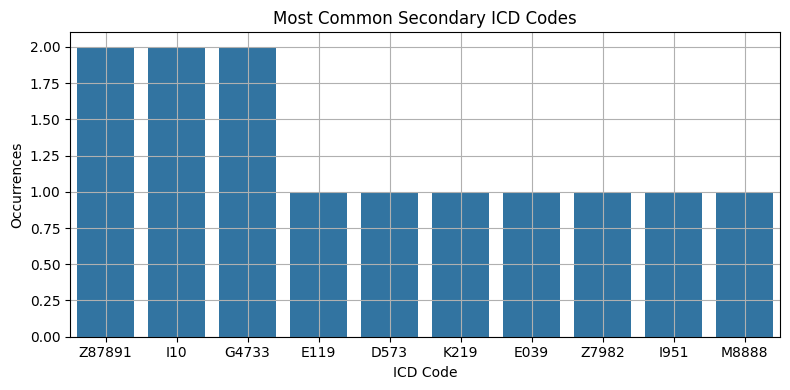

In [54]:
# Flatten and count secondary codes
secondary_codes = []
for patient in cases:
    if "secondary_icd_codes" in patient:
        secondary_codes.extend(patient["secondary_icd_codes"])

secondary_count = Counter(secondary_codes)

# Top 10 most frequent
most_common = secondary_count.most_common(10)

# Plot
codes, counts = zip(*most_common)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(codes), y=list(counts))
plt.title("Most Common Secondary ICD Codes")
plt.xlabel("ICD Code")
plt.ylabel("Occurrences")
plt.grid(True)
plt.tight_layout()
plt.show()

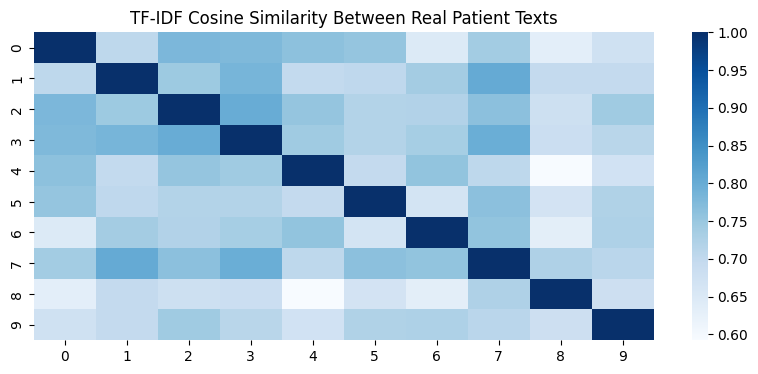


TF-IDF Cosine Similarity Stats:
Min: 0.5923, Max: 0.8041, Mean: 0.7195, >0.9: 0


In [ ]:
texts = [c["text"] for c in cases if "text" in c]


# TF-IDF Similarity
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(texts)
tfidf_cos_sim = cosine_similarity(tfidf_matrix)

# Visualizations
plt.figure(figsize=(10, 4))
sns.heatmap(tfidf_cos_sim, cmap="Blues", annot=False)
plt.title("TF-IDF Cosine Similarity Between Real Patient Texts")
plt.show()

# Stats
def similarity_stats(matrix, label):
    vals = matrix[np.triu_indices_from(matrix, k=1)]
    print(f"\n{label} Cosine Similarity Stats:")
    print(f"Min: {vals.min():.4f}, Max: {vals.max():.4f}, Mean: {vals.mean():.4f}, >0.9: {(vals > 0.9).sum()}")

similarity_stats(tfidf_cos_sim, "TF-IDF")

